In [5]:
library(MLSeq)
library(tximport)
library(tidyverse)
library(DESeq2)
set.seed(1111)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


T

In [20]:
counts_dir = "../counts/"
counts_files = list.files(counts_dir, pattern = "*.tsv")

In [76]:
sample_table = tibble(fileName = counts_files,
                      sampleName = counts_files,
                      condition = ifelse(str_detect(fileName, "A[0-9]+"), "A", "H") %>% factor(levels = c("H", "A")))
sample_table %>% head

fileName,sampleName,condition
<chr>,<chr>,<fct>
SRR26050650_GSM7778640_H16_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050650_GSM7778640_H16_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,H
SRR26050651_GSM7778639_H25_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050651_GSM7778639_H25_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,H
SRR26050652_GSM7778638_H24_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050652_GSM7778638_H24_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,H
SRR26050653_GSM7778637_H22_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050653_GSM7778637_H22_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,H
SRR26050654_GSM7778636_H21_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050654_GSM7778636_H21_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,H
SRR26050655_GSM7778635_H20_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050655_GSM7778635_H20_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,H


In [23]:
ddsHTSeq <- DESeqDataSetFromHTSeqCount(sampleTable = sample_table,
                                       directory = counts_dir,
                                       design= ~ condition)
ddsHTSeq

class: DESeqDataSet 
dim: 63187 49 
metadata(1): version
assays(1): counts
rownames(63187): ENSG00000000003.16 ENSG00000000005.6 ...
  ENSG00000293559.1 ENSG00000293560.1
rowData names(0):
colnames(49):
  SRR26050650_GSM7778640_H16_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv
  SRR26050651_GSM7778639_H25_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv ...
  SRR26050697_GSM7778593_A6_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv
  SRR26050698_GSM7778592_A1_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv
colData names(1): condition

In [34]:
count_data = counts(ddsHTSeq)
vars <- sort(apply(count_data, 1, var, na.rm = TRUE), decreasing = TRUE)
data <- count_data[names(vars)[1:100], ]
nTest <- ceiling(ncol(data) * 0.3)
ind <- sample(ncol(data), nTest, FALSE)
class = sample_table %>% transmute(condition)
data %>% head()

,SRR26050650_GSM7778640_H16_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050651_GSM7778639_H25_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050652_GSM7778638_H24_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050653_GSM7778637_H22_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050654_GSM7778636_H21_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050655_GSM7778635_H20_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050656_GSM7778634_H19_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050657_GSM7778633_H15_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050658_GSM7778632_H14_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050659_GSM7778631_H11_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,⋯,SRR26050689_GSM7778601_A57_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050690_GSM7778600_A53_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050691_GSM7778599_A45_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050692_GSM7778598_A43_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050693_GSM7778597_A41_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050694_GSM7778596_A38_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050695_GSM7778595_A33_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050696_GSM7778594_A27_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050697_GSM7778593_A6_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv,SRR26050698_GSM7778592_A1_miRNA-seq_Homo_sapiens_miRNA-Seq.tsv
ENSG00000203875.13,129855,467665,296412,450115,567858,256402,627122,436312,604883,428692,⋯,1546,497993,258142,89962,81885,121426,557496,156393,341195,254670
ENSG00000234741.10,19797,40089,112253,53349,65259,27183,69796,54086,73212,44482,⋯,431,142708,122798,24545,18502,20593,176802,35555,61034,72091
ENSG00000199994.1,33574,68006,6702,29152,28626,11039,59479,68842,44653,68226,⋯,130,77426,69695,47562,92173,50793,39813,69631,45569,11419
ENSG00000201098.1,46814,17290,6314,56657,27594,15706,51784,40354,32474,54054,⋯,211,42722,150207,34064,63255,54655,153791,149356,51208,30389
ENSG00000199753.1,9827,49099,60493,36925,37107,16598,53433,33010,46459,25344,⋯,224,126155,15828,13604,26182,9529,36791,16435,55171,25360
ENSG00000207031.1,11639,24187,19920,46503,69740,26458,68551,54512,55957,44977,⋯,135,60252,45969,10218,5495,9873,75708,22145,34473,35104


In [39]:
# Minimum count is set to 1 in order to prevent 0 division problem within
# classification models.
data.train <- as.matrix(data[ ,-ind] + 1)
data.test <- as.matrix(data[ ,ind] + 1)
classtr <- class[-ind, ]
classts <- class[ind, ]

In [41]:
data.trainS4 = DESeqDataSetFromMatrix(countData = data.train, colData = classtr,
design = formula(~condition))
data.testS4 = DESeqDataSetFromMatrix(countData = data.test, colData = classts,
design = formula(~condition))

converting counts to integer mode

converting counts to integer mode



gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



123456789101112131415161718192021222324252627282930111111111111111111111111111111111111111111111111111
  An object of class "MLSeq"
  Model Description: Nearest Shrunken Centroids (pam)

            Method  :  pam 

       Accuracy(%)  :  88.24 
    Sensitivity(%)  :  81.82 
    Specificity(%)  :  91.3 

  Reference Class   :  H 



Nearest Shrunken Centroids 

 34 samples
100 predictors
  2 classes: 'H', 'A' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 27, 28, 26, 27, 28, 27, ... 
Resampling results across tuning parameters:

  threshold   Accuracy   Kappa     
  0.08049286  0.8729762  0.72976232
  0.32197143  0.8722619  0.72617808
  0.56345000  0.8784524  0.73323035
  0.80492858  0.8717857  0.71029056
  1.04640715  0.8450000  0.62969743
  1.28788573  0.7411905  0.26594096
  1.52936430  0.6832143  0.04769711
  1.77084287  0.6798810  0.01176471
  2.01232145  0.6770238  0.00000000
  2.25380002  0.6770238  0.00000000

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was threshold = 0.56345.

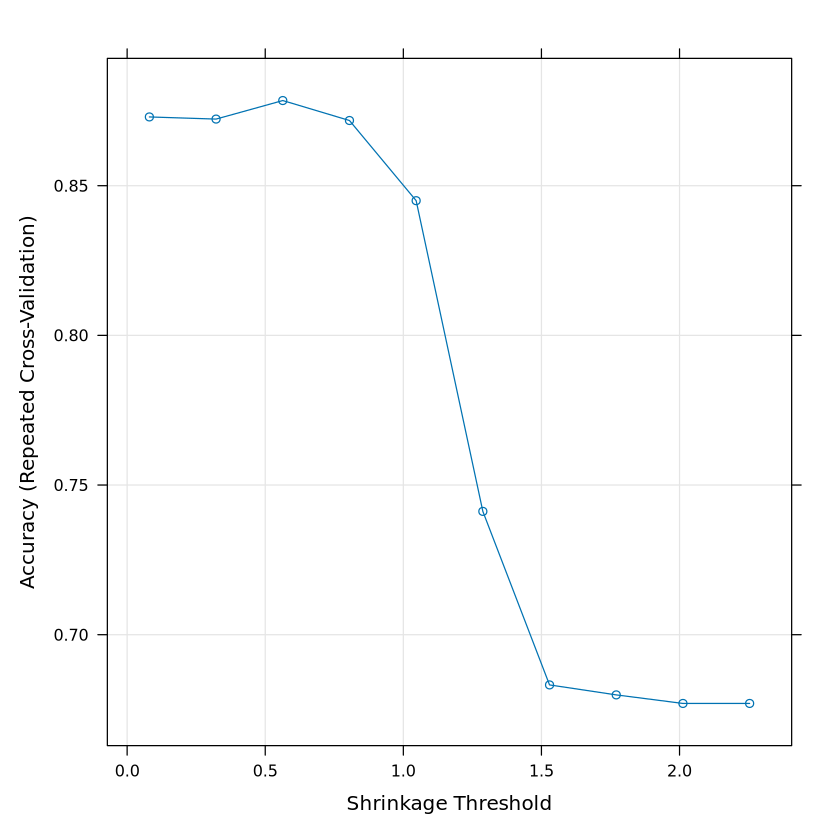

In [78]:
# Nearest shrunken centroids
fit.NSC <- classify(data = data.trainS4, method = "pam",
preProcessing = "deseq-vst", ref = "H", tuneLength = 10,
control = trainControl(method = "repeatedcv", number = 5,
repeats = 10, classProbs = TRUE))
show(fit.NSC)
trained(fit.NSC)
plot(fit.NSC)

In [51]:
# All methods
availableMethods()

[1] "amdai"             "AdaBag"            "treebag"          
 [4] "bagFDA"            "bayesglm"          "gamboost"         
 [7] "glmboost"          "BstLm"             "LogitBoost"       
[10] "bstSm"             "blackboost"        "bstTree"          
[13] "C5.0"              "rpart"             "rpart1SE"         
[16] "rpart2"            "rpartScore"        "cforest"          
[19] "ctree"             "ctree2"            "C5.0Cost"         
[22] "rpartCost"         "deepboost"         "dda"              
[25] "dwdPoly"           "dwdRadial"         "fda"              
[28] "gam"               "glm"               "gpls"             
[31] "glmnet"            "protoclass"        "hda"              
[34] "hdda"              "hdrda"             "kknn"             
[37] "knn"               "svmLinearWeights2" "svmLinear3"       
[40] "lvq"               "lda"               "lda2"             
[43] "stepLDA"           "dwdLinear"         "loclda"           
[46] "Mlda"              "mda"               "avNNet"           
[49] "mlp"               "mlpWeightDecay"    "mlpWeightDecayML" 
[52] "mlpML"             "earth"             "gcvEarth"         
[55] "nb"                "nbDiscrete"        "pam"              
[58] "nnet"              "pcaNNet"           "ORFlog"           
[61] "ORFpls"            "ORFridge"          "ORFsvm"           
[64] "pls"               "pda"               "PenalizedLDA"     
[67] "plr"               "multinom"          "qda"              
[70] "stepQDA"           "rbf"               "rf"               
[73] "rda"               "rlda"              "RRF"              
[76] "Linda"             "rmda"              "QdaCov"           
[79] "rrlda"             "bdk"               "sdwd"             
[82] "sparseLDA"         "spls"              "gbm"              
[85] "svmLinear"         "svmPoly"           "svmRadial"        
[88] "voomDLDA"          "voomDQDA"          "voomNSC"          
[91] "PLDA"              "PLDA2"             "NBLDA"

In [79]:
# Define control lists.
ctrl.continuous <- trainControl(method = "repeatedcv", number = 5, repeats = 10)
ctrl.discrete <- discreteControl(method = "repeatedcv", number = 5, repeats = 10,
tuneLength = 10)

# 1. Continuous classifiers, SVM and NSC
# fit.svm <- classify(data = data.trainS4, method = "svmRadial",
# preProcessing = "deseq-vst", ref = "H", tuneLength = 10,
# control = ctrl.continuous)
fit.NSC <- classify(data = data.trainS4, method = "pam",
preProcessing = "deseq-vst", ref = "H", tuneLength = 10,
control = ctrl.continuous)
# 2. Discrete classifiers
fit.plda <- classify(data = data.trainS4, method = "PLDA", normalize = "deseq",
ref = "H", control = ctrl.discrete)
fit.plda2 <- classify(data = data.trainS4, method = "PLDA2", normalize = "deseq",
ref = "H", control = ctrl.discrete)
fit.nblda <- classify(data = data.trainS4, method = "NBLDA", normalize = "deseq",
ref = "H", control = ctrl.discrete)

# 4. Predictions
# pred.svm <- predict(fit.svm, data.testS4)
pred.NSC <- predict(fit.NSC, data.testS4)

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



123456789101112131415161718192021222324252627282930111111111111111111111111111111111111111111111111111

variance of dispersion residuals not estimated (necessary only for differential expression calling)



In [80]:
# Check predictions
pred.NSC <- relevel(pred.NSC, ref = "H")
actual <- relevel(classts$condition, ref = "H")
tbl <- table(Predicted = pred.NSC, Actual = actual)
confusionMatrix(tbl, positive = "H")


Confusion Matrix and Statistics

         Actual
Predicted  H  A
        H  4  0
        A  0 11
                                    
               Accuracy : 1         
                 95% CI : (0.782, 1)
    No Information Rate : 0.7333    
    P-Value [Acc > NIR] : 0.009539  
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.2667    
         Detection Rate : 0.2667    
   Detection Prevalence : 0.2667    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : H         
                                    

In [83]:
# Some methods allow selecting markers
selectedGenes(fit.plda2)

[1] "ENSG00000203875.13" "ENSG00000239043.1"